## 1 复现线性SVM、决策树和朴素贝叶斯并修改参数

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 

from sklearn.model_selection import train_test_split # 随机划分训练集、测试集 
from sklearn.preprocessing import StandardScaler # 标准化数据集 

# 导入三种分别的数据集，都是具体数据函数生成 
from sklearn.datasets import make_moons, make_circles, make_classification

导入三类分类器。

In [38]:
from sklearn.svm import SVC # 支持向量机 
from sklearn.tree import DecisionTreeClassifier # 决策树分类器 
from sklearn.naive_bayes import GaussianNB # 先验为高斯分布的朴素贝叶斯分类器

设置分类器参数。

In [45]:
# 设置显示结果的图的标题 
names = ["Linear SVM", "Decision Tree", "Naive Bayes"] 

# 设置分类器，用到线性SVM，决策树，朴素贝叶斯 
classifiers = [     
    SVC(kernel="linear", C=0.05), # 修改penalty对应参数为0.05     
    DecisionTreeClassifier(max_depth=5),     
    GaussianNB(priors=[0.5, 0.5])] # 设定朴素贝叶斯的先验概率

设置数据集，生成三种分布的数据集（月牙、环形、可线性分割的）。

In [62]:
# 设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,                         
                        random_state=1, n_clusters_per_class=1) 

rng = np.random.RandomState(2) # 设置一个伪随机数种子 
X += 2 * rng.uniform(size=X.shape) # 对x变量上加上随机扰动 
linearly_separable = (X, y) # 将上述得到的x，y构建为一个线性可分的数据集

# 选择三个数据集 
# make_moons 数据呈月牙状 
# make_circles 数据呈环状 
# linearly_separable 前面设置的线性可分数据集 

datasets = [make_moons(noise=0.1, random_state=0),          
            make_circles(noise=0.1, factor=0.5, random_state=1),          
            linearly_separable] 

# 设置显示结果图的大小 
figure = plt.figure(figsize=(54, 18)) 
i = 1

<Figure size 3888x1296 with 0 Axes>



如下代码包含数据集的外循环和分类方法实现的内循环。
首先对之前设定的三个数据集分别进行预处理：
* 用StandScaler标准化数据，按照比例分割为训练集和测试集
* 设置网格，画出输入数据的散点图

之后，分别对每个分类器测试和生成可视化：
* 对分类器训练、测试，利用fit()函数训练，利用score函数计算测试集的准确度
* 绘制分类面，对预设的网格点进行处理（展平后拼接）和分类
* 利用coutouf函数绘制分类的平面等高线

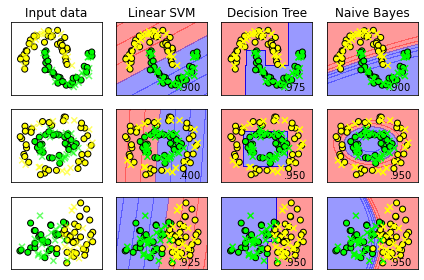

In [63]:
for ds_cnt, ds in enumerate(datasets):     
    # 处理数据集     
    X, y = ds     
    X = StandardScaler().fit_transform(X) # 标准化数据 
    
    #分割数据集 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42) 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5     
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5     
    
    h = .02 #设置网络的步长 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))     
    
    #先展示输入数据集     
    cm = ListedColormap((['red', 'blue'])) # 设置分割面颜色     
    cm_bright = ListedColormap(['#FFFF00', '#00FF00']) # 设置散点颜色，修改为黄色和绿色    
    ax = plt.subplot(len(datasets), len(classifiers)+1, i) # 划分子面     
    if ds_cnt==0:         
        ax.set_title("Input data")
    # 画训练集散点     
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright, edgecolors='k',marker='o',label='train set')     
    # 画测试集散点     
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors='k',marker='x',label='test set')     
    # 画坐标轴     
    ax.set_xlim(xx.min(), xx.max())     
    ax.set_ylim(yy.min(), yy.max())     
    ax.set_xticks(())     
    ax.set_yticks(())     
    i += 1
    
    # 分别对每个分类器做训练测试     
    for name, clf in zip(names, classifiers): # zip()方法传入两个list，并将其打包成字典 
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)    

        clf.fit(X_train, y_train) # 训练集训练分类器         
        score = clf.score(X_test, y_test) # 测试集测试分类器

        if hasattr(clf, "decision_function"): # 判断是否有decision_function内置方法        
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 非常常见的写法     
        else:           
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]         
        Z = Z.reshape(xx.shape)         

        # 分类结果用等高线函数画出         
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        
        # 画训练集点         
        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k', marker='o', label='train set')       
        # 画测试集点         
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', marker='x', label='test set')         
        # 画坐标轴        
        ax.set_xlim(xx.min(), xx.max())         
        ax.set_ylim(yy.min(), yy.max())        
        ax.set_xticks(())        
        ax.set_yticks(())        
        if ds_cnt==0:             
            # 画子图标题           
            ax.set_title(name)   

        # 显示测试正确率，精度改为.3f     
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f'% score).lstrip('0'), size=10, horizontalalignment='right')         
        i += 1
    
plt.tight_layout()
plt.show()


## 选做1 选取其他数据集并用上述三类分类器分类，展示结果

本例子中通过make_blobs方法自己创造了一个有2个中心点的块区域的散点数据集，并进行了分割和预处理。

In [73]:
from sklearn.datasets import make_blobs

n_samples = 10000
n_bins = 2  # 设定目标 2个簇

centers = [(-5, -5), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)

# 按奇偶赋予标签
y[: n_samples // 2] = 0
y[n_samples // 2 :] = 1

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.8, random_state=42)

figure = plt.figure(figsize=(54, 18)) 
i = 1

<Figure size 3888x1296 with 0 Axes>

重复之前的训练和预测代码，并将结果可视化。
本例子为了简单演示，没有使用较为复杂的数据集，时间有限，本来想尝试更复杂的。🤡

不过，结果还是有非常有趣的内容存在，即可以看出决策树不像另外两者一样考虑到欧氏距离的关系，对应在图上是一条水平分割线，而另外两者不是。

在简单的可线性分类的数据集上，采用SVM会更易实现，而贝叶斯分类器则适用于更复杂的场景。

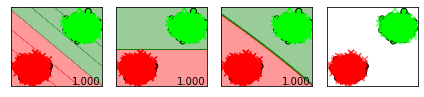

In [77]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5     
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5     

h = .02 #设置网络的步长 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))     

#先展示输入数据集     
cm = ListedColormap((['red', 'green'])) # 设置分割面颜色     
cm_bright = ListedColormap(['#FF0000', '#00FF00']) # 设置散点颜色   
ax = plt.subplot(3, len(classifiers)+1, i) # 划分子面     
if ds_cnt==0:         
    ax.set_title("Input data")
# 画训练集散点     
ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright, edgecolors='k',marker='o',label='train set')     
# 画测试集散点     
ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors='k',marker='x',label='test set')     
# 画坐标轴     
ax.set_xlim(xx.min(), xx.max())     
ax.set_ylim(yy.min(), yy.max())     
ax.set_xticks(())     
ax.set_yticks(())     
i = 1

# 分别对每个分类器做训练测试     
for name, clf in zip(names, classifiers): # zip()方法传入两个list，并将其打包成字典 
    ax = plt.subplot(3, len(classifiers)+1, i)    

    clf.fit(X_train, y_train) # 训练集训练分类器         
    score = clf.score(X_test, y_test) # 测试集测试分类器

    if hasattr(clf, "decision_function"): # 判断是否有decision_function内置方法        
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 非常常见的写法     
    else:           
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]         
    Z = Z.reshape(xx.shape)         

    # 分类结果用等高线函数画出         
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # 画训练集点         
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k', marker='o', label='train set')       
    # 画测试集点         
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', marker='x', label='test set')         
    # 画坐标轴        
    ax.set_xlim(xx.min(), xx.max())         
    ax.set_ylim(yy.min(), yy.max())        
    ax.set_xticks(())        
    ax.set_yticks(())        
    if ds_cnt==0:             
        # 画子图标题           
        ax.set_title(name)   

    # 显示测试正确率，精度改为.3f     
    ax.text(xx.max() - .3, yy.min() + .3, ('%.3f'% score).lstrip('0'), size=10, horizontalalignment='right')         
    i += 1
    
plt.tight_layout()
plt.show()

## 选做2-1 决策树对于不同max_depth对于分类的影响

一般来说，常用的取值范围在10～100都是合理的。如果数据量小于模型量，则通常会过拟合（模型参数过于贴合训练数据）；反之，则会欠拟合。

## 选做2-2 朴素贝叶斯对于不同先验概率修改对于分类的影响


从结果看出，先验概率对于二分类的情况，如果设定其中一个分类的先验概率越高，则根据公式，其推测概率更高，在图上对应的即分类曲线更偏向其分类数据一侧，这是可以预料的。一般的，将先验设置为0.5即可。所以也可以理解为权重，或者置信度。

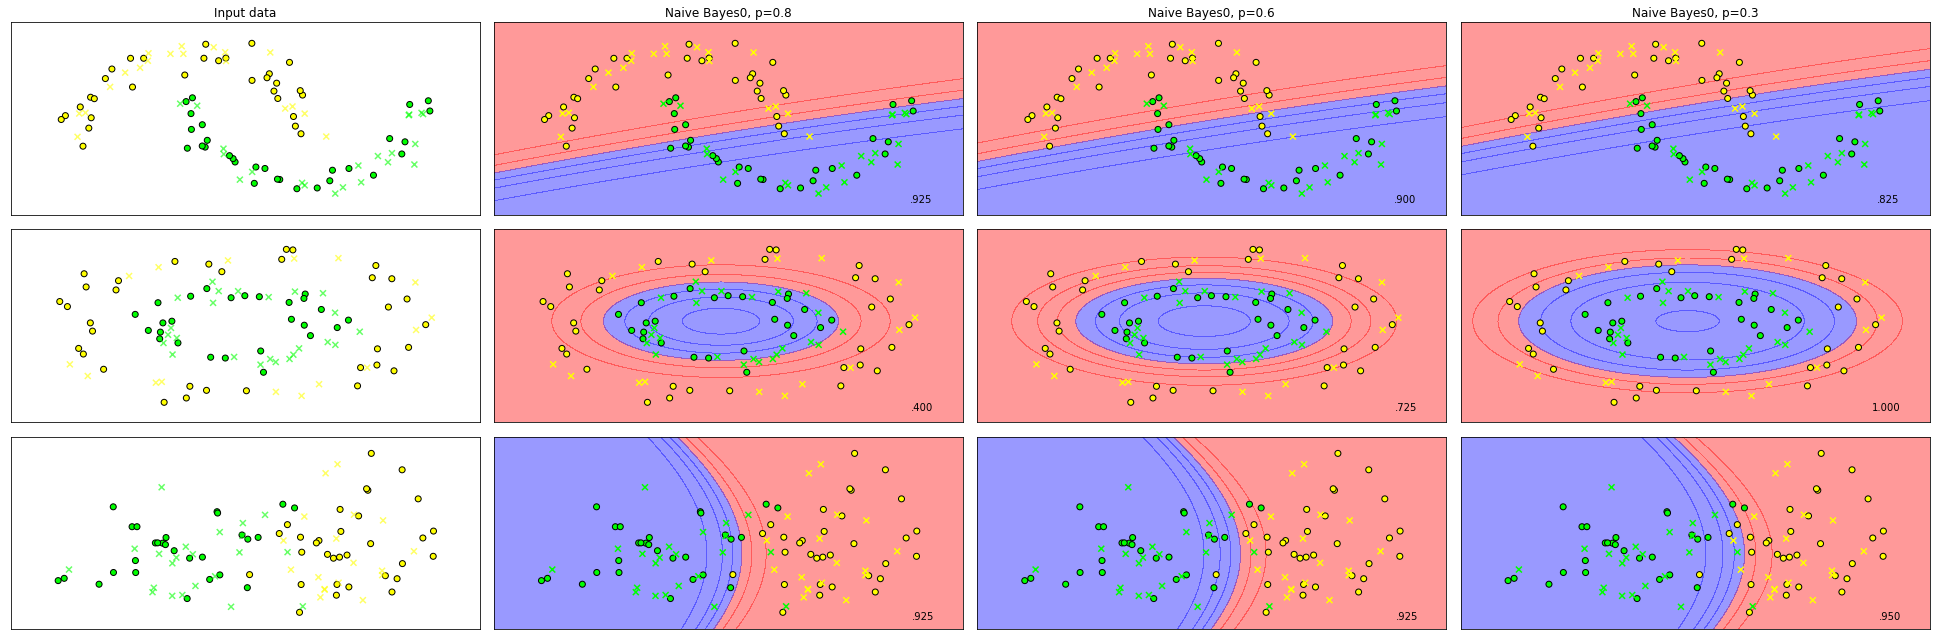

In [93]:
# 设置显示结果的图的标题 
names = ["Naive Bayes{}, p={}".format(i, j) for i in range(3) for j in [0.8, 0.6, 0.3]] * 3

# 设置分类器，用到线性SVM，决策树，朴素贝叶斯 
clf = classifiers = [     
    GaussianNB(priors=[0.8, 0.2]), # 修改penalty对应参数为0.05     
    GaussianNB(priors=[0.6, 0.4]),     
    GaussianNB(priors=[0.3, 0.7])] # 设定朴素贝叶斯的先验概率 # 设定朴素贝叶斯的先验概率

# 设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,                         
                        random_state=1, n_clusters_per_class=1) 

rng = np.random.RandomState(2) # 设置一个伪随机数种子 
X += 2 * rng.uniform(size=X.shape) # 对x变量上加上随机扰动 
linearly_separable = (X, y) # 将上述得到的x，y构建为一个线性可分的数据集

# 选择三个数据集 
# make_moons 数据呈月牙状 
# make_circles 数据呈环状 
# linearly_separable 前面设置的线性可分数据集 

datasets = [make_moons(noise=0.1, random_state=0),          
            make_circles(noise=0.1, factor=0.5, random_state=1),          
            linearly_separable] 

# 设置显示结果图的大小 
figure = plt.figure(figsize=(27, 9)) 

i = 1
for ds_cnt, ds in enumerate(datasets):     
    # 处理数据集     
    X, y = ds     
    X = StandardScaler().fit_transform(X) # 标准化数据 
    
    #分割数据集 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42) 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5     
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5     
    
    h = .02 #设置网络的步长 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))     
    
    #先展示输入数据集     
    cm = ListedColormap((['red', 'blue'])) # 设置分割面颜色     
    cm_bright = ListedColormap(['#FFFF00', '#00FF00']) # 设置散点颜色，修改为黄色和绿色    
    ax = plt.subplot(len(datasets), len(classifiers)+1, i) # 划分子面     
    if ds_cnt==0:         
        ax.set_title("Input data")
    # 画训练集散点     
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright, edgecolors='k',marker='o',label='train set')     
    # 画测试集散点     
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors='k',marker='x',label='test set')     
    # 画坐标轴     
    ax.set_xlim(xx.min(), xx.max())     
    ax.set_ylim(yy.min(), yy.max())     
    ax.set_xticks(())     
    ax.set_yticks(())     
    i += 1
    
    # 分别对每个分类器做训练测试     
    for name, clf in zip(names, classifiers): # zip()方法传入两个list，并将其打包成字典 
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)    

        clf.fit(X_train, y_train) # 训练集训练分类器         
        score = clf.score(X_test, y_test) # 测试集测试分类器

        if hasattr(clf, "decision_function"): # 判断是否有decision_function内置方法        
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 非常常见的写法     
        else:           
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]         
        Z = Z.reshape(xx.shape)         

        # 分类结果用等高线函数画出         
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        
        # 画训练集点         
        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k', marker='o', label='train set')       
        # 画测试集点         
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', marker='x', label='test set')         
        # 画坐标轴        
        ax.set_xlim(xx.min(), xx.max())         
        ax.set_ylim(yy.min(), yy.max())        
        ax.set_xticks(())        
        ax.set_yticks(())        
        if ds_cnt==0:             
            # 画子图标题           
            ax.set_title(name)   

        # 显示测试正确率，精度改为.3f     
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f'% score).lstrip('0'), size=10, horizontalalignment='right')         
        i += 1
    
plt.tight_layout()
plt.show()